# Лабораторная работа 2.3.1
# Получение и измерение вакуума

## Теория

Сначала измерим объем различных частей установки, запуская в них газ известного количества и измеряя давление этого газа с помощью масляного манометра.
$$ V = V_0\frac{P_0}{P_0+\rho gh} $$
Затем перейдем к основной части работы. Основное уравнение, описывающее процесс откачки
$$ -VdP=(PW-Q_{\text{Д}}-Q_{\text{Н}}-Q_{\text{И}})dt $$
Здесь $Q_{\text{Д}}$ - количество газа, десорбирующегося естественным путем с поверхности откачиваемого объема; $Q_{\text{И}}$ - количество газа, проникающего в этот объем через течи; $Q_{\text{Н}}$ - поток газа, поступающего из насоса назад в систему.$$$$
При достижении предельного вакуума изменение давления равно 0. Тогда:
$$ W=\frac{\sum Q_i}{P_{\text{пр}}} $$
Считая, что $Q_i\approx const$ и $P_{\text{пр}} \ll P$, получаем:
$$ P=P_{\text{пр}}+P_0 \exp\Bigr(-\frac W V t\Bigl) $$
Теперь рассмотрим процесс ухудшения вакуума. При этом насос отключен от установки, поэтому получаем:
$$ W=0,\ Q_{\text{Н}}=0 $$
Отсюда получаем:
$$ \frac{dP}{dT}=\frac{Q_{\text{Д}}+Q_{\text{И}}}{V_{\text{вв}}} $$

## Измерения

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import smartlab as sl

### Измерение объемов частей установки

$$P_0=(0.017\,\pm\,0.001)\ torr, V_0=(50\,\pm\,3)\ cm^3$$
$$ h_1^1 = 30.8\ cm\ h_2^1=16.2\ cm $$
$$ h_1^2 = 28.4\ cm\ h_2^2=18.6\ cm $$
Отсюда находим:
$$ \text{Объем форвакуумной части: } V_{\text{фв}}=(4.00\,\pm\,0.02)\ l $$
$$ \text{Объем всей установки: } V_{\text{п}}=(5.87\,\pm\,0.03)\ l $$
$$ \text{Объем высоковакуумной части: } V_{\text{вв}}=V_{\text{п}}-V_{\text{фв}}=(1.87\,\pm\,0.05)\ l $$

$$ \text{Предельное давление: } P_{\text{пр}} = 6\cdot 10^{-5}\ torr = 6\ \text{делений} $$
$$ \text{Установившееся давление: } P_{\text{уст}} = 12\cdot 10^{-5}\ torr = 12\ \text{делений} $$

### Улучшение вакуума

$n$ - число делений на манометре; $N=\frac{n-6}{n_0}$

In [8]:
incdf = pd.read_csv('Vacuum+.tsv', delimiter='\t')
incdf['$\\ln N$'] = np.log((incdf.ix[:, 0]-6)/66)
incdf

,$n$,"$t, s$",$\ln n$
0,66,0.0,-0.095310
1,60,0.3,-0.200671
2,50,0.8,-0.405465
3,46,1.1,-0.500775
4,40,1.6,-0.663294
5,38,1.8,-0.723919
6,36,2.0,-0.788457
7,32,2.4,-0.931558
8,30,2.8,-1.011601
9,28,3.1,-1.098612


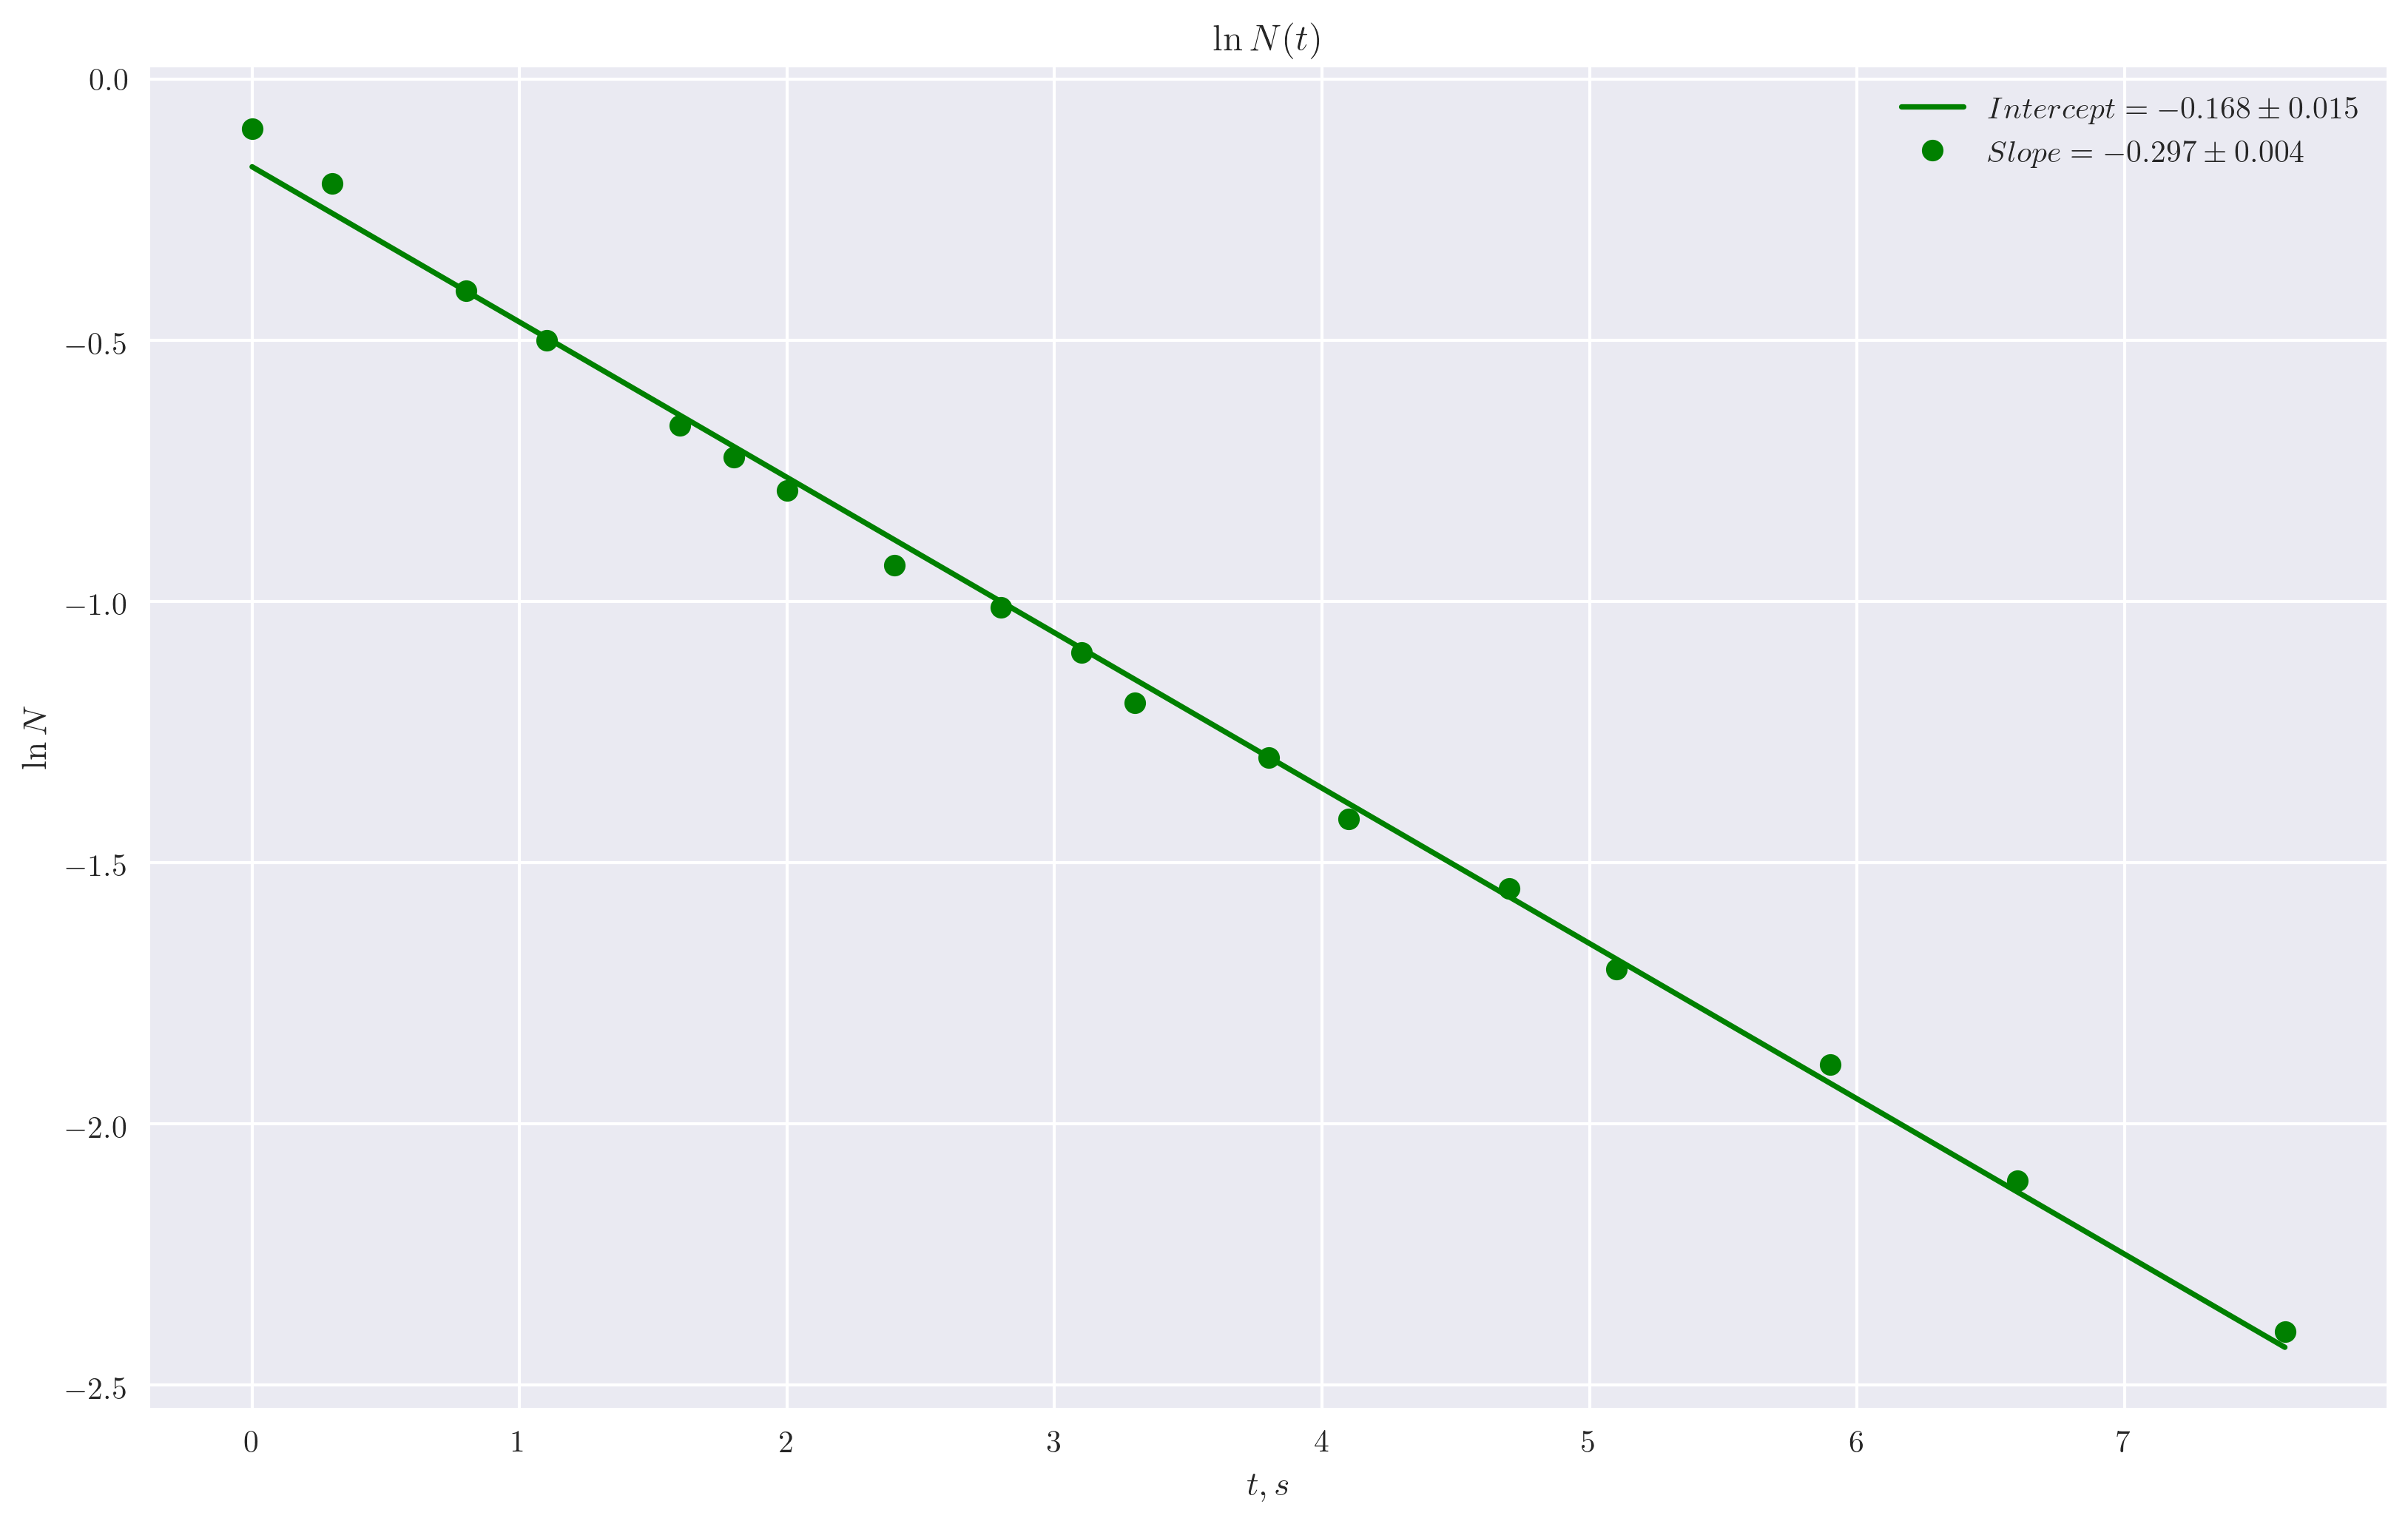

In [10]:
sl.linplot(incdf.ix[:, 1], incdf.ix[:, 2], xlabel='$t, s$', ylabel='$\\ln N$', title='$\\ln N(t)$')

Из графика находим $W$:
$$ W = - Slope\cdot V_{\text{вв}} = (5.55\,\pm\,0.08)\cdot 10^{-4}\ \frac{m^3}{s} $$

### Ухудшение вакуума

In [4]:
decdf = pd.read_csv('Vacuum-.tsv', delimiter='\t')
decdf

,$n$,"$t, s$"
0,10,4.2
1,12,7.2
2,14,10.4
3,16,12.7
4,18,15.4
5,20,18.3
6,22,21.2
7,24,23.9
8,26,26.7
9,28,29.3


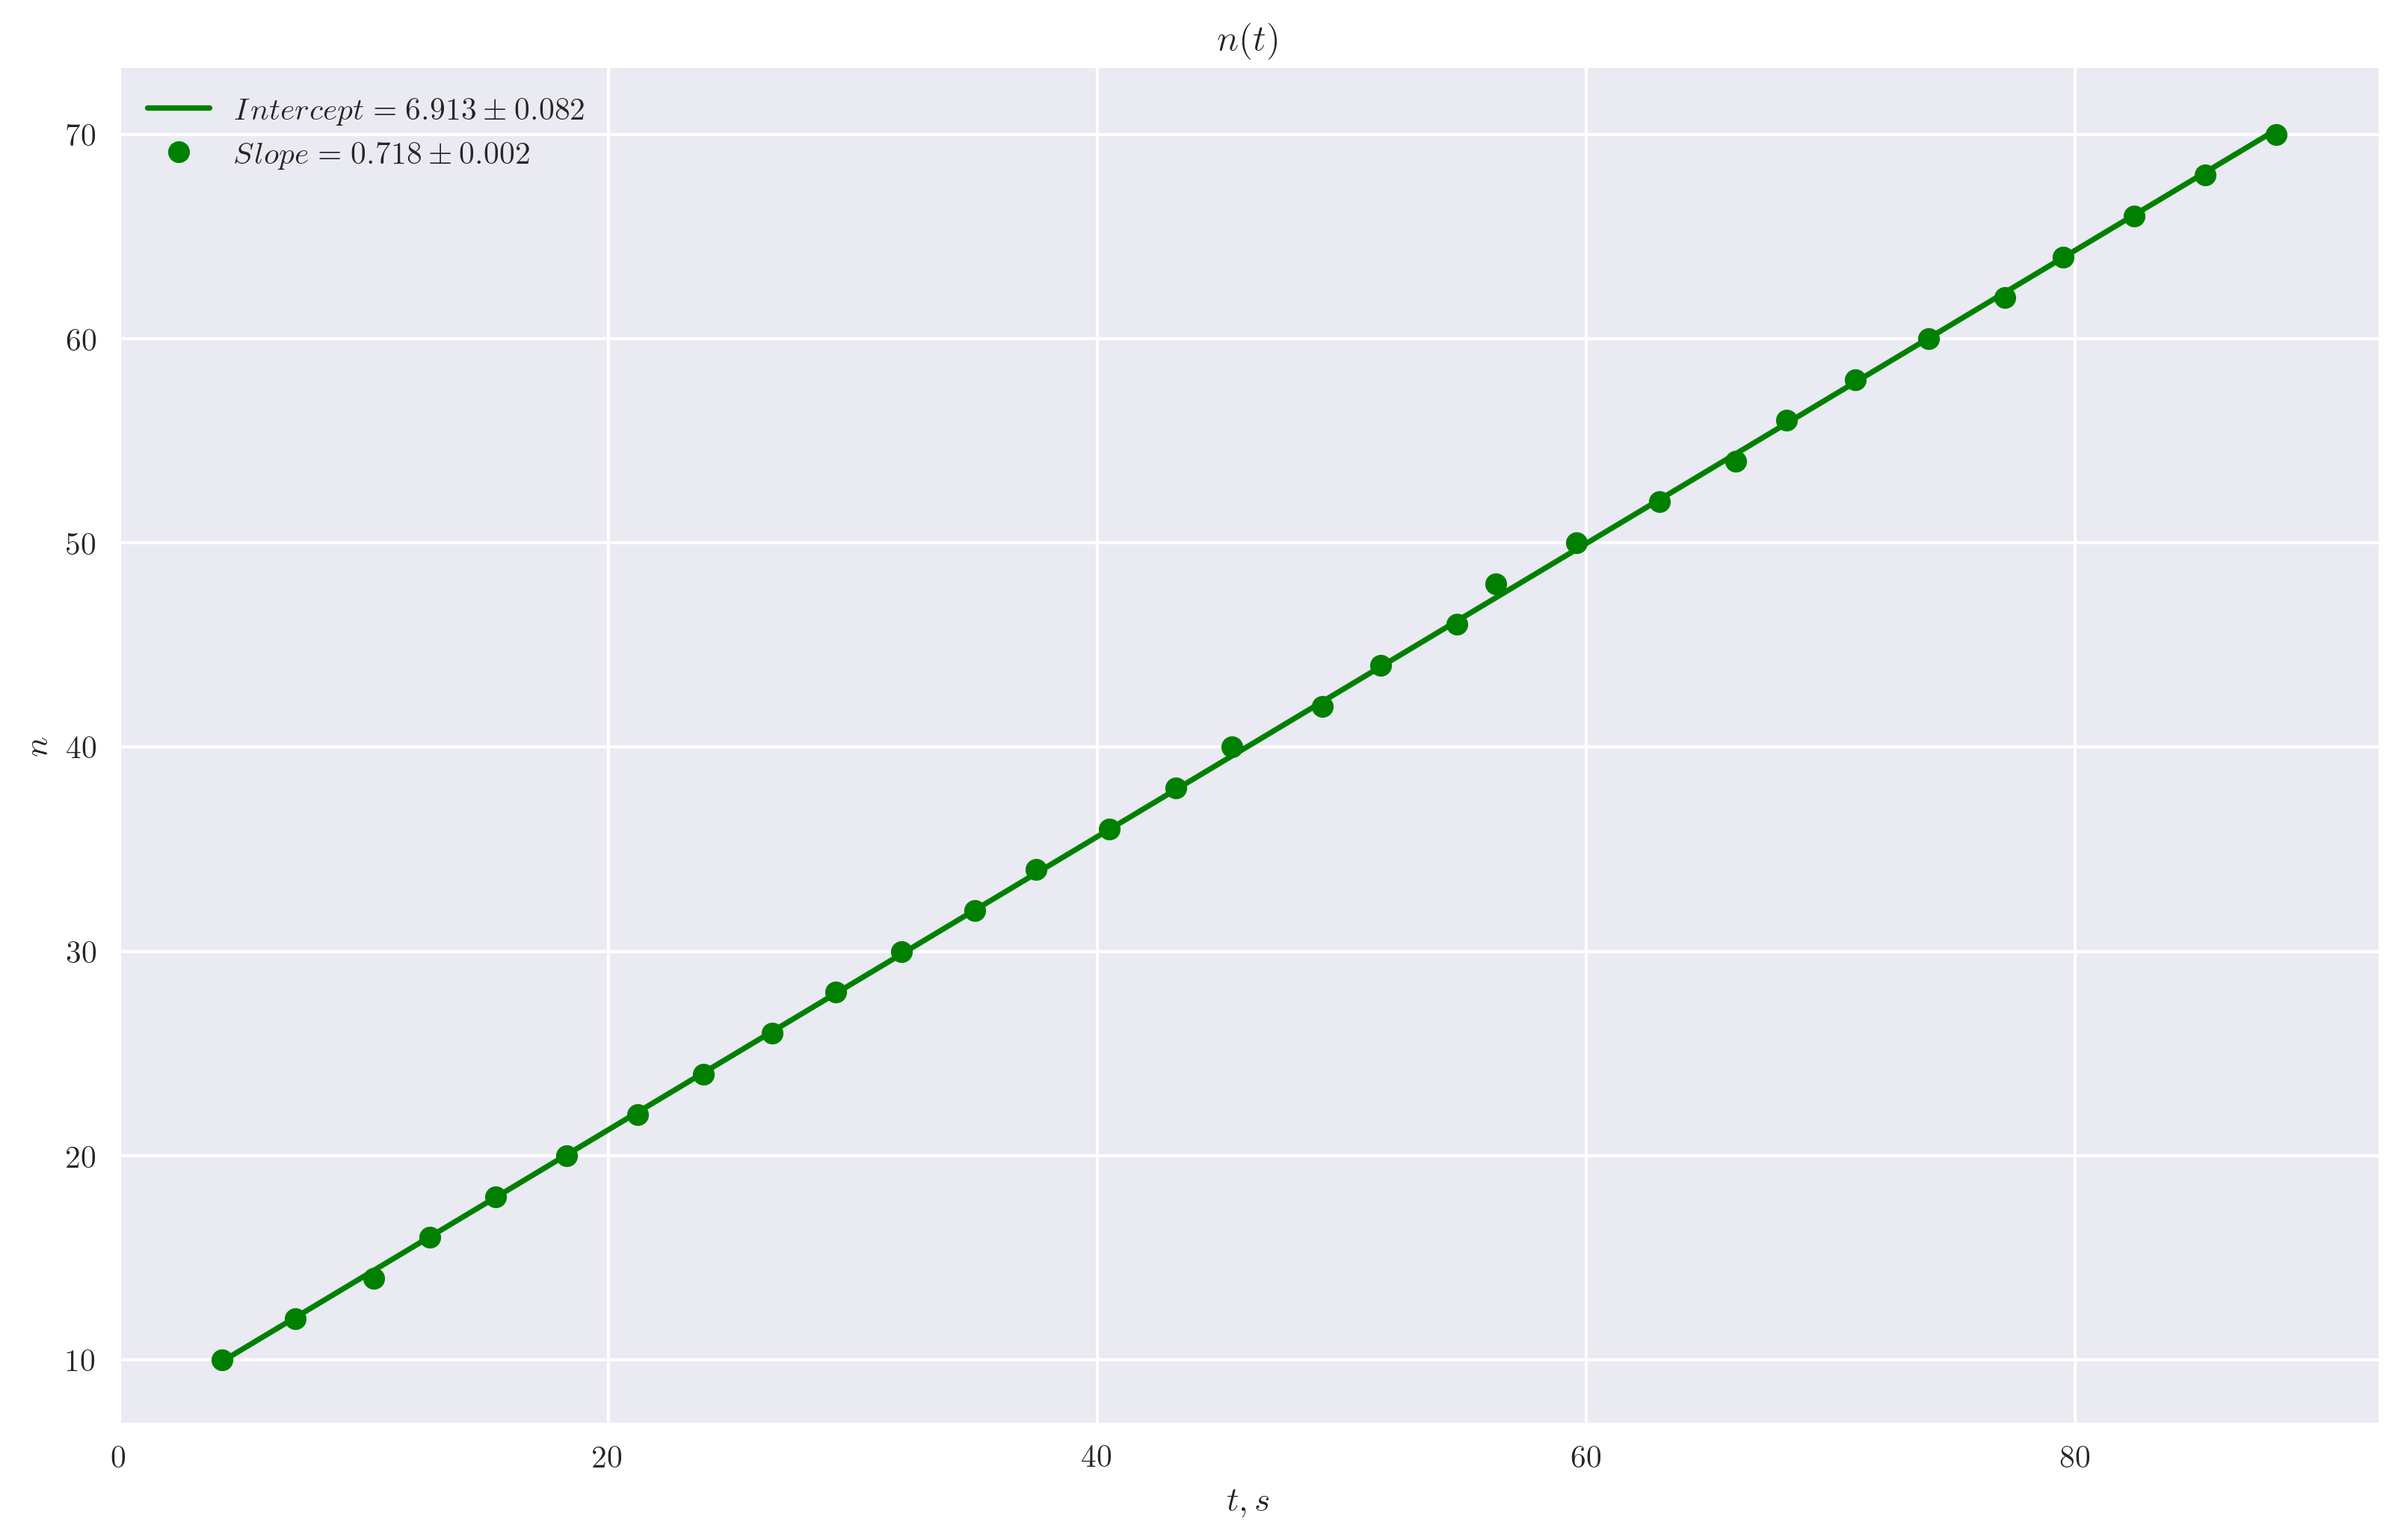

In [6]:
sl.linplot(decdf.ix[:, 1], decdf.ix[:, 0], xlabel='$t, s$', ylabel='$n$', title='$n(t)$')

Из графика и формулы для предельного давления найдем $Q_H$:
$$ Q_H= (2.64\,\pm\,0.02)\cdot 10^{-6}\ \frac J s $$

Затем устроим течь через капилляр. Пренебрегая давлением у конца, обращенного к насосу, получим выражение для количества газа, покидающего капилляр:
$$ \frac{d(PV)}{dt}=\frac 4 3 r^3 \sqrt{\frac{2\pi RT}{\mu}} \frac{P_{\text{уст}}}L $$
Для нашей установки рассчитаем данную производную:
$$ \frac{d(PV)}{dt}=1.8\cdot 10^{-11} \frac J s $$
Тогда получаем выражение для W:
$$ W = \frac 1 {P_{\text{уст}}-P_{\text{пр}}} \frac{d(PV)}{dt} = 2.25\cdot 10^{-4} \frac {m^3}s $$

## Выводы

Получен высокий вакуум $\approx 6\cdot 10^{-5}\ torr$ $$$$
Значения для $W$ по порядку совпадают:
$$ W_1 = 5.6\cdot 10^{-4}\ \frac{m^3}s $$
$$ W_2 = 2.3\cdot 10^{-4}\ \frac{m^3}s $$